# Classification of Astrophysical Objects
### Using Decision Trees


> Adarsh Reddy Madur

> 210050091











In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('star_classification.csv', index_col=0)

In [3]:
print(df.columns)

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')


Of the above parameters; 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID',  'plate',
       'MJD' and 'fiber_ID' have nothing to do with the actual observations and were added just to catalogue the data. So we need not work with those parameters.

In [4]:
df1 = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD','fiber_ID'], axis = 1)
df1.head()

,alpha,delta,u,g,r,i,z,class,redshift
obj_ID,,,,,,,,,
1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


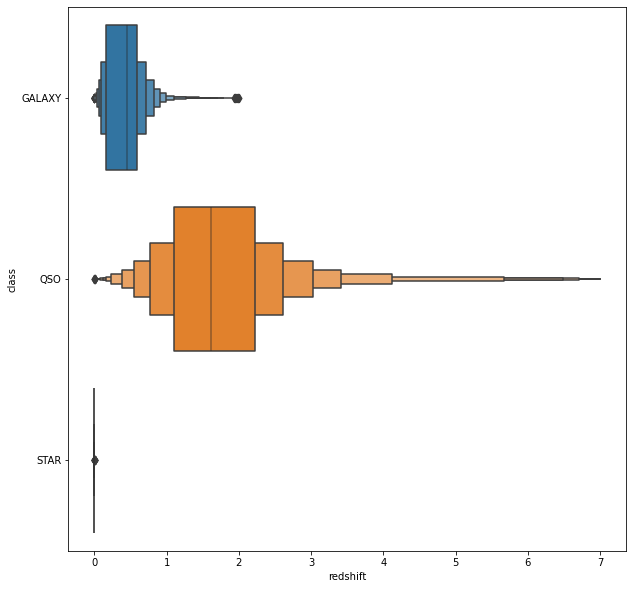

In [5]:

plt.figure(figsize = (10,10))
sns.boxenplot(x ="redshift", y='class',
              data = df1, width = 0.8)


It is clear from the above figure that stars in the data set have very very low redshifts. This is because they are from within our galaxy (at most could be from our satellite galaxies). It is not possible to observe individual sars from far away galaxies with current technology. 

u, g, r, i and z are magnitudes and are distance dependent. We anyway get the distance information from the redshift. To get just the spectral information its better to use 'color', that is difference between magnitudes in two different bands. \
Example : R - I (= r - i), U - R, ...

In [11]:
a = df1.to_numpy()
UR = a[:,2] - a[:, 4]
GR = a[:,3] - a[:, 4]
IR = a[:,5] - a[:, 4]
ZR = a[:,6] - a[:, 4]
DF = pd.DataFrame({'class':a[:,7],'redshift':a[:,8], 'U-R':UR, 'G-R':GR, 'I-R':IR, 'Z-R':ZR, 'alpha':a[:,0],'delta':a[:,1]})
DF.head()

,class,redshift,U-R,G-R,I-R,Z-R,alpha,delta
0,GALAXY,0.634794,3.48381,1.88029,-1.22928,-1.6013,135.689107,32.494632
1,GALAXY,0.779136,2.19315,0.24744,-1.41632,-0.97017,144.826101,31.274185
2,GALAXY,0.644195,4.65331,2.05413,-1.26119,-1.66149,142.18879,35.582444
3,GALAXY,0.932346,0.5252,2.16494,-1.10708,-2.36152,338.741038,-0.402828
4,GALAXY,0.116123,2.93971,1.08281,-0.52036,-0.95286,345.282593,21.183866


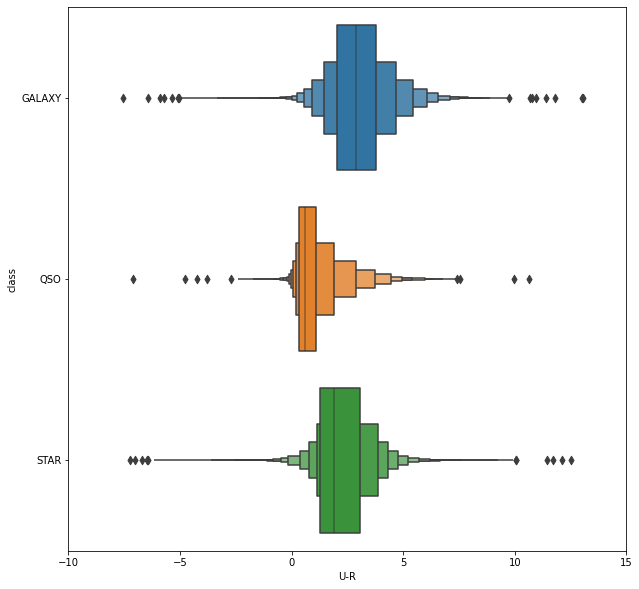

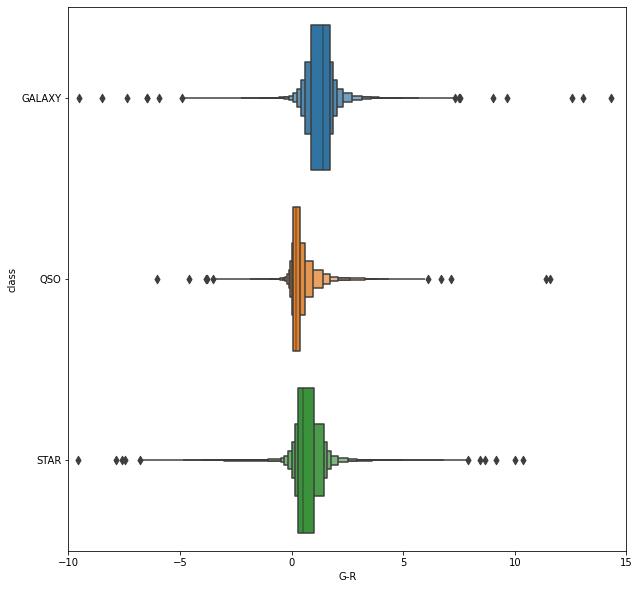

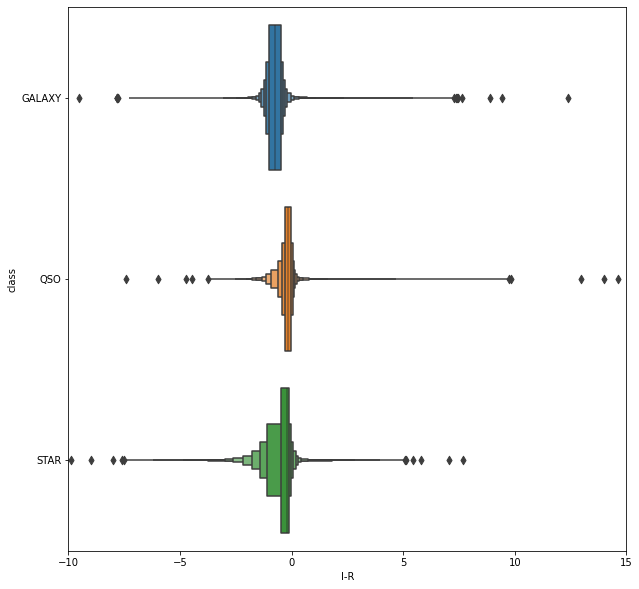

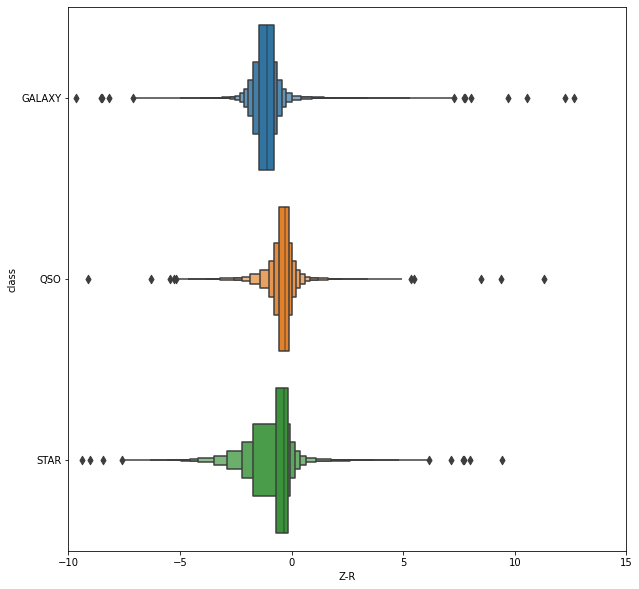

In [14]:
plt.figure(figsize = (10,10))
plt.xlim(-10, 15)
sns.boxenplot(x ="U-R", y='class', data = DF, width = 0.8)
plt.figure(figsize = (10,10))
plt.xlim(-10, 15)
sns.boxenplot(x ="G-R", y='class', data = DF, width = 0.8)
plt.figure(figsize = (10,10))
plt.xlim(-10, 15)
sns.boxenplot(x ="I-R", y='class', data = DF, width = 0.8)
plt.figure(figsize = (10,10))
plt.xlim(-10, 15)
sns.boxenplot(x ="Z-R", y='class', data = DF, width = 0.8)

## Decision Tree

In [8]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier

Let us take first N = 10000 data points as test data and the rest as training data.

In [84]:
N = 10000

A = DF.to_numpy()
features = A[N:,1:]
target = A[N:,0]

print(features, target)

[[-0.0008595382 1.8824499999999986 0.5265699999999995 ...
  -0.3300599999999996 146.317203877535 61.8935157315703]
 [2.507961 1.846269999999997 0.460289999999997 ... -0.41558000000000206
  317.250204348297 1.05541317632249]
 [0.0001012609 2.6741600000000005 2.3997199999999985 ...
  -2.5923499999999997 9.16349575047775 1.97304190334691]
 ...
 [0.1433656 2.964880000000001 1.06569 ... -0.8520700000000012
  224.587407436133 15.7007073929529]
 [0.4550396 5.436530000000001 1.7237100000000005 ... -1.28904
  212.268621115206 46.6603652793367]
 [0.5429442 2.0205599999999997 1.1963000000000008 ... -1.3203999999999994
  196.896052965211 49.4646427730825]] ['STAR' 'QSO' 'STAR' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [85]:
decisiontree = DecisionTreeClassifier(random_state=0) 
model = decisiontree.fit(features, target)

In [88]:
x = 0
features, target, A = data(N) 
for i in range(N):
  observation = [A[i,1:]] 
  B = model.predict(observation)[0]
  if B == A[i,0]:
    x += 1
print('Test Accuracy :', x/10000)

Test Accuracy : 0.9639


In [91]:
# from sklearn import tree

# dot_data = tree.export_graphviz(decisiontree, out_file=None,feature_names=['redshift', 'U-R', 'G-R', 'I-R', 'Z-R', 'alpha','delta']
#                                , class_names=['GALAXY','QSO','STAR'])

## Random Forests

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A[:,1:],A[:,0], test_size=0.5)

In [114]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, criterion = 'entropy')
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [115]:
y_pred=clf.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.97468
